In [115]:
from neuralprophet import NeuralProphet
import pandas as pd

In [116]:
df = pd.read_csv('tpcc_table_growth.csv')
df = df[['ds', 'public.customer']].rename(columns={"public.customer": "y"})
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [117]:
m = NeuralProphet()

In [118]:
df

,ds,y
0,2022-03-31 02:00:07.519114496,18604032
1,2022-03-31 02:00:07.521159936,18604032
2,2022-03-31 02:00:07.523153152,18604032
3,2022-03-31 02:00:07.525199616,18604032
4,2022-03-31 02:00:07.527209216,18604032
...,...,...
31924,2022-03-31 02:01:09.193139200,20406272
31925,2022-03-31 02:01:09.194998528,20406272
31926,2022-03-31 02:01:09.196884992,20406272
31927,2022-03-31 02:01:09.198766592,20406272


In [119]:
metrics = m.fit(df, freq='MS')

INFO - (NP.df_utils._infer_frequency) - Major frequency 1882880N corresponds to 0.226% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq MS. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling yearly seasonality. Run NeuralProphet with yearly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 77


  0%|          | 0/162 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.39E-02, min: 3.89E-02


  0%|          | 0/162 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 1.39E-02, min: 3.89E-02
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.68E-02
Epoch[77/77]: 100%|██████████| 77/77 [00:50<00:00,  1.54it/s, SmoothL1Loss=9.5e-6, MAE=5.05e+3, RMSE=7.59e+3, RegLoss=0] 


INFO - (NP.df_utils._infer_frequency) - Major frequency 1882880N corresponds to 0.226% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq MS. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 90.0% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - MS
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/neuralprophet/forecaster.py:1406: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = d

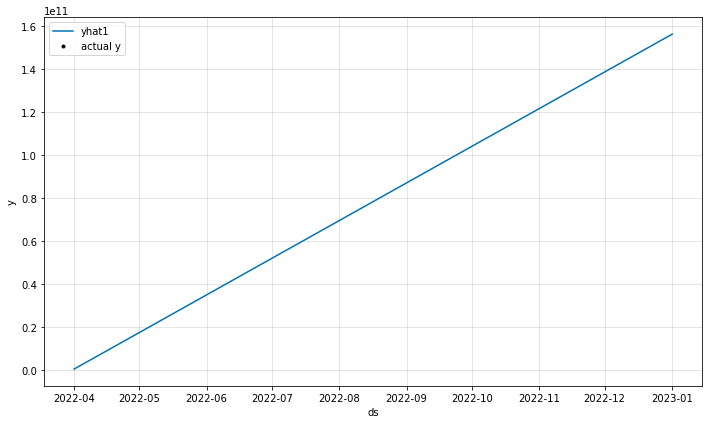

In [120]:
future = m.make_future_dataframe(df=df, periods=10)
forecast = m.predict(df=future)
fig_forecast = m.plot(forecast)

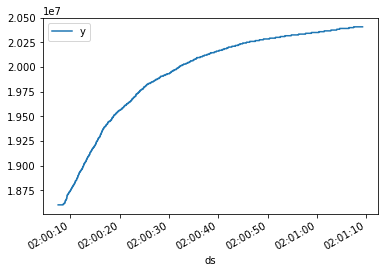

In [121]:
df.plot(x='ds', y='y')

INFO - (NP.df_utils._infer_frequency) - Major frequency 1882880N corresponds to 0.226% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq MS. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
INFO - (NP.df_utils._infer_frequency) - Major frequency 1882880N corresponds to 0.226% of the data.
WARNING - (NP.df_utils._infer_frequency) - Dataframe has multiple frequencies. It will be resampled according to given freq MS. Ignore message if actual frequency is any of the following:  SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS.
WARNING - (py.warnings._showwarnmsg) - /Users/kaifranz/Library/Python/3.8/lib/python/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[

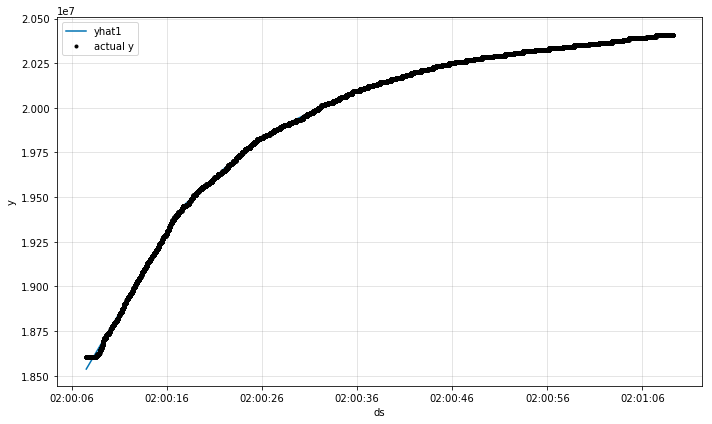

In [122]:
forecast = m.predict(df)
fig_forecast = m.plot(forecast)